# Duplicate values in dataset

In [1]:
import sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()
df_to_test.dropna(axis=0,inplace=True)
df_to_test = df_to_test[df_to_test['sex'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['sex'] >= 0]

sanity_checks_methods.drop_negative_age(df)

## Duplicate value with choice feature

### 10% - avg_glucose_level

--------------------------------------
Number of rows:  9999
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0
ADDING 10% TO FEATURE: avg_glucose_level 

Number of rows:  10998
Duplicate Counts:  999
Percentage of Duplicate Values:  9.083469721767594
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3822
           1       0.97      1.00      0.98      3876

    accuracy                           0.98      7698
   macro avg       0.98      0.98      0.98      7698
weighted avg       0.98      0.98      0.98      7698

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1666
           1       0.93      1.00      0.96      1634

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.97      0.96      0.96      3300

Class

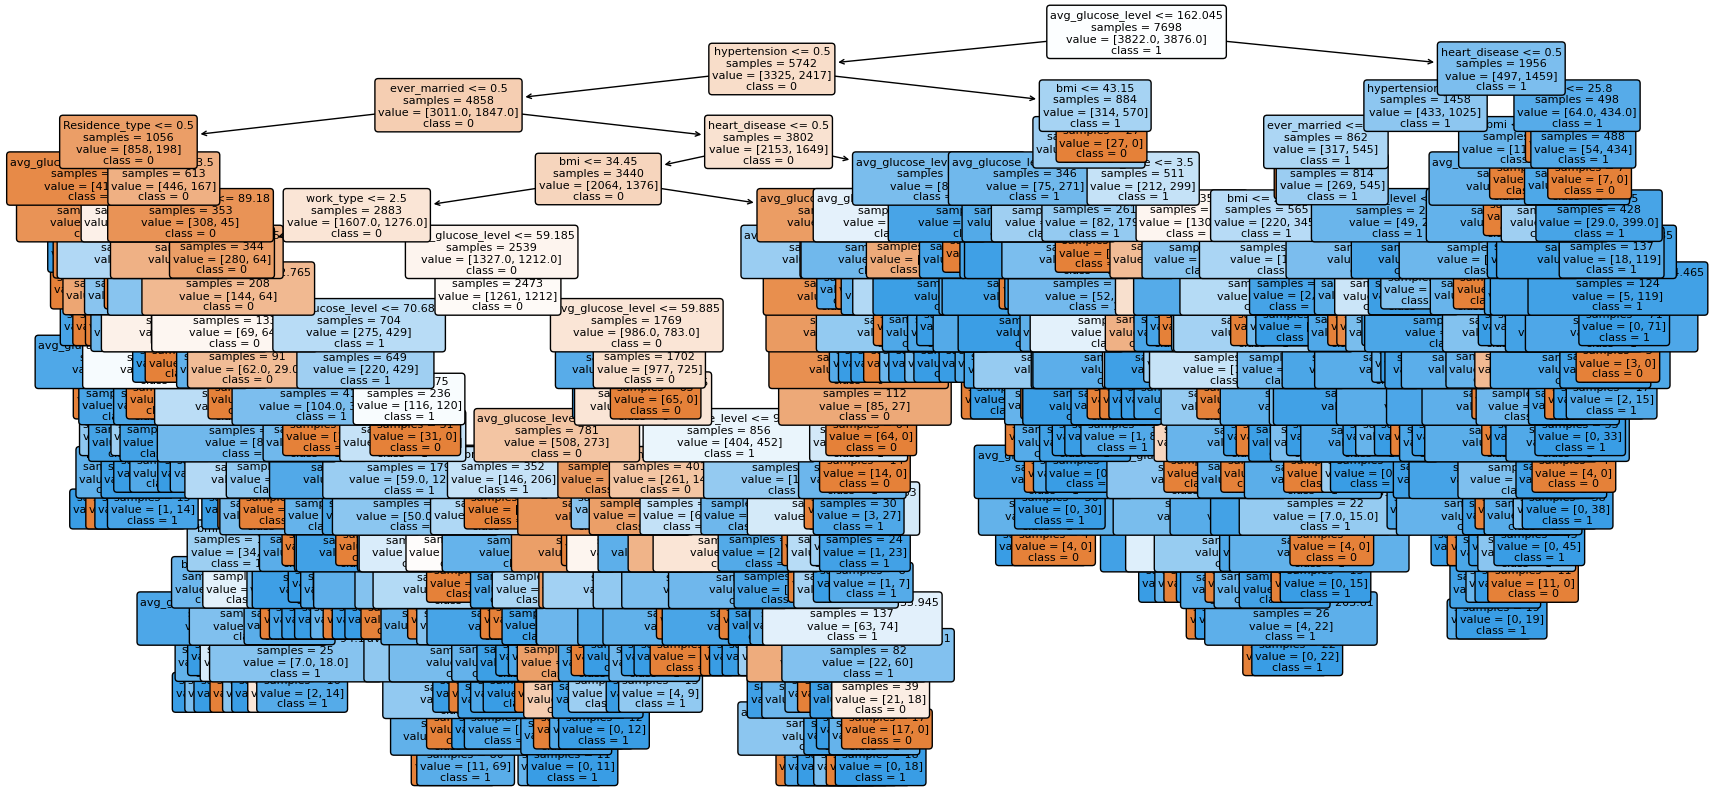

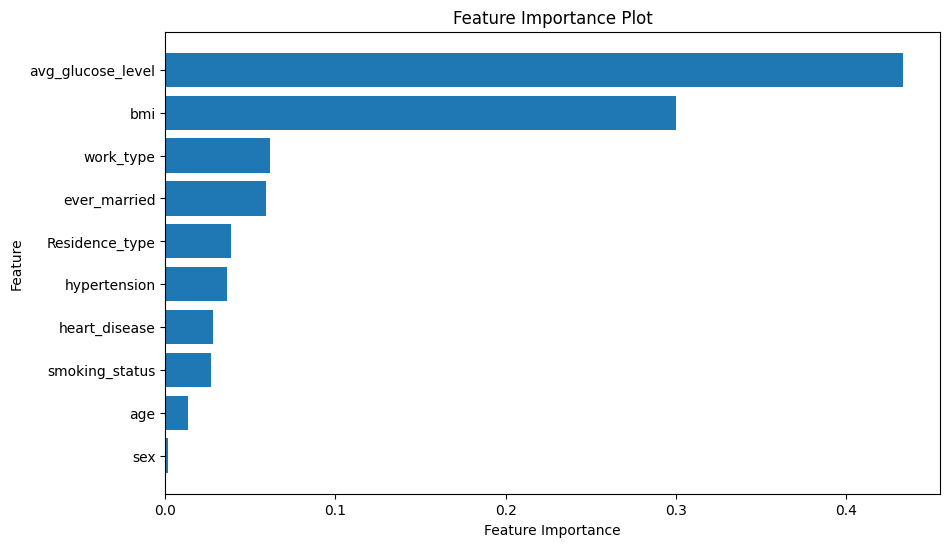

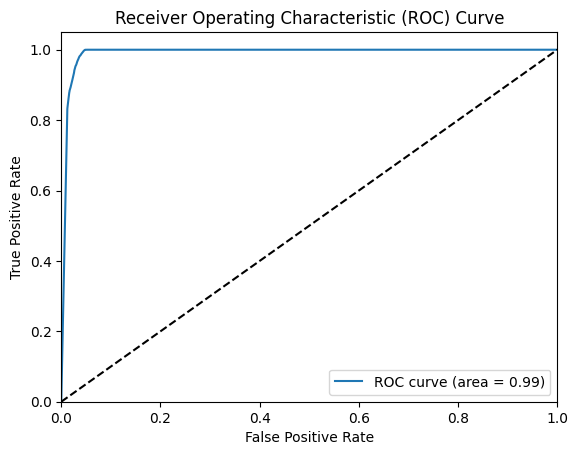

AUC Score: 0.9908801760352071


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9636363636363636, 0.9636363636363636, 0.9558441558441558, 0.9584415584415584, 0.9662337662337662, 0.961038961038961, 0.9714285714285714, 0.9558441558441558, 0.951885565669701, 0.9544863459037711]
Mean accuracy: 0.9602475807677366
95% confidence interval: (0.9559185050509369, 0.9645766564845364)


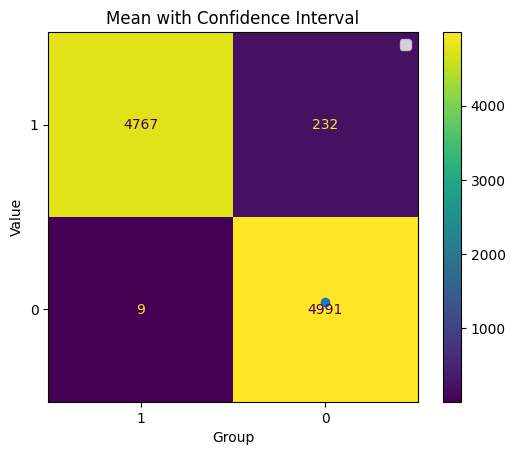


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 46.910226583480835
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.3, 'max_depth': 4, 'max_iter': 348, 'min_samples_leaf': 13}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3822
           1       1.00      1.00      1.00      3876

    accuracy                           1.00      7698
   macro avg       1.00      1.00      1.00      7698
weighted avg       1.00      1.00      1.00      7698

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1666
           1       0.99      1.00      0.99      1634

    accuracy                           0.99      3300
   macro avg       

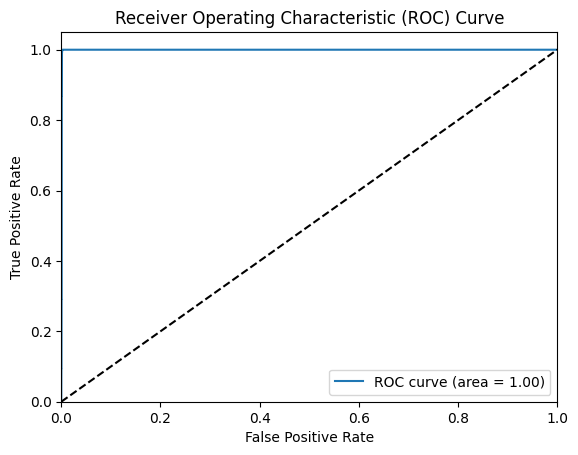

AUC Score: 0.9991799159831967


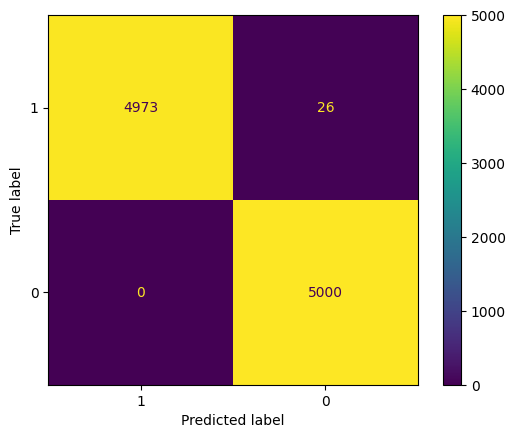

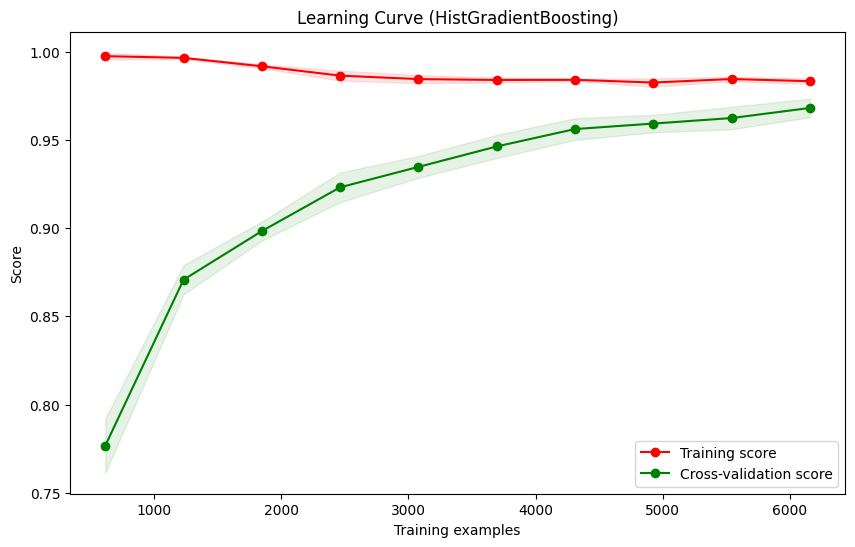

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9914285714285714, 0.9814285714285714, 0.9857142857142858, 0.9785714285714285, 0.9885714285714285, 0.9942857142857143, 0.9814285714285714, 0.9785714285714285, 0.9757142857142858, 0.9928469241773963]
Mean accuracy: 0.9848561209891683
95% confidence interval: (0.9801075585397965, 0.9896046834385401)


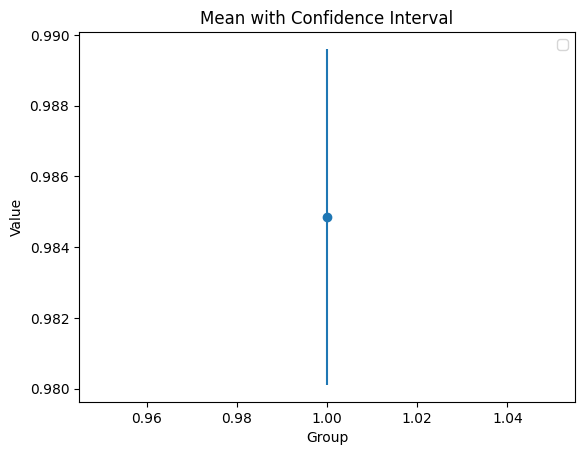

--------------------------------------


In [2]:
print('--------------------------------------')
sanity_checks_methods.print_duplicates_values(df) 

print(f'ADDING 10% TO FEATURE: avg_glucose_level \n')

# Aggiungi duplicati solo al set di addestramento
df_n = sanity_checks_methods.duplicates_values(df, 10)

sanity_checks_methods.print_duplicates_values(df_n)

# Addestra il modello utilizzando il set di addestramento con duplicati
decision_tree = ML_algorithms.train_decision_tree_model(df_n, df_to_test)

# Valida il modello con k-fold cross-validation utilizzando solo il set di addestramento originale
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_n)

print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_n, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

print('--------------------------------------')